#### What is Gradient Descent ?

##### Gradient Descent is an optimization algorithm used to minimize the error (or cost) of a machine learning model by adjusting its parameters (weights) iteratively.

##### Imagine you are standing on top of a mountain and want to reach the lowest point (valley).
##### You can’t see the entire path, so you take small steps downward in the steepest direction.
##### This is exactly what Gradient Descent does in machine learning—it moves in the direction of decreasing error.

#### How Does It Work?
##### Start with Initial Values
##### The algorithm begins with random values for the parameters (weights).
##### Example: If we have a simple linear equation 𝑦 = 𝑚𝑥 + 𝑐 then m and c are our parameters.

##### Compute the Cost (Error)
##### The cost function (like Mean Squared Error) tells how far our predictions are from actual values.
##### Formula for Mean Squared Error (MSE): 𝐽(𝑚,𝑐) = 1 𝑛∑(𝑦 pred − 𝑦 actual)2 

##### Find the Direction of Steepest Descent (Gradient Calculation)
##### The gradient is the slope of the cost function with respect to each parameter.
##### It tells us in which direction we should move to reduce error.

##### Compute the partial derivatives of the cost function then updates the parameters and determines learning rate if too small training will be slow if too large training data might overfit. Keep repeating steps until cost function stops decreasing significantly which means we found best possible values of m and c to minimise error.

#### Types of Gradient Descent :

#### Batch Gradient Descent (BGD)

##### Uses the entire dataset to compute the gradient before updating the parameters.
##### It provides stable convergence but can be slow for large datasets.
##### Suitable for small to medium-sized datasets.

#### Stochastic Gradient Descent (SGD)

##### Updates parameters using one random data point at a time.
##### Faster but introduces more noise, making convergence unstable.
##### Works well for large datasets.

#### Mini-Batch Gradient Descent

##### A mix between Batch Gradient Descent and Stochastic Gradient Descent.
##### Uses a small batch of data points instead of all or just one.
##### Reduces noise while maintaining speed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score
from sklearn.utils import shuffle

### Batch Gradient Descent

In [2]:
# loading car dataset
df = pd.DataFrame(sns.load_dataset("mpg"))
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# drop null values
# df['horsepower'].isnull().sum()
# df['mpg'].isnull().sum()
df = df[['horsepower', 'mpg']].dropna()

In [4]:
# normalising data since gd expects data in 2d array therefore it is required to reshape it 
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [23]:
#Initialising parameters

#Slope and intercept
m, c = 0,0 
# Step size for updates
learning_rate = 0.01  
# Number of iterations
epochs = 1000
# Number of data points
n = len(y)

# defining cost function (Mean Squared Error)
def cost_fn(X,y,m,c):
    predictions = m*X+c
    return (1/n) * np.sum((predictions - y) ** 2)

# performing batch gradient descent 
cost_history = []
for i in range(epochs):
    # Compute predictions
    predictions = m*X+c
    # Compute gradient for m (slope)
    dm = (-2/n) * np.sum(X * (y - predictions))
    # Compute gradient for c (intercept)
    dc = (-2/n) * np.sum(y - predictions)

    # Update slope
    m -= learning_rate * dm

    # Update intercept
    c -= learning_rate * dc

    # Storing cost for visualization
    cost_history.append(cost_fn(X,y,m,c))

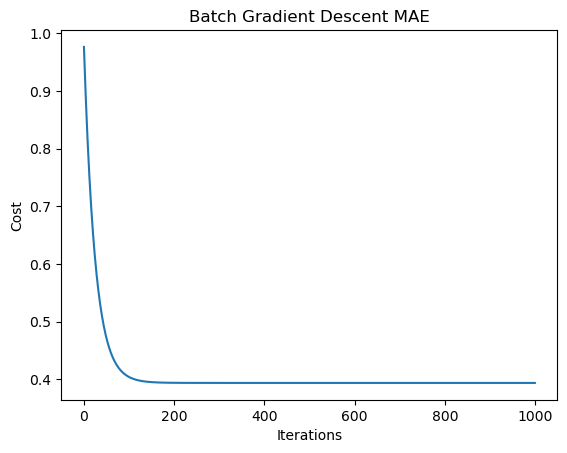

In [6]:
# Plotting cost vs iterations graph
plt.plot(range(epochs), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Batch Gradient Descent MAE")
plt.show()

In [7]:
# train test the data to get accuracy score and prediction
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Linear Regression default uses Batch Gradient Descent internally
model = LinearRegression()
model.fit(X_train, y_train)

#Get Predictions
y_pred = model.predict(X_test)
print("Batch Gradient Descent Results:")
print("R² Score:", r2_score(y_test, y_pred) * 100 )
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Batch Gradient Descent Results:
R² Score: 56.596818222561836
Mean Squared Error: 0.3645858908234409


### Stochastic Gradient Descent

In [8]:
#load data set
df2 = pd.DataFrame(sns.load_dataset("mpg"))
df2.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
66,17.0,8,304.0,150.0,3672,11.5,72,usa,amc ambassador sst
281,19.8,6,200.0,85.0,2990,18.2,79,usa,mercury zephyr 6
262,19.2,8,305.0,145.0,3425,13.2,78,usa,chevrolet monte carlo landau
383,38.0,4,91.0,67.0,1965,15.0,82,japan,honda civic
45,18.0,6,258.0,110.0,2962,13.5,71,usa,amc hornet sportabout (sw)


In [9]:
df2 = df2[['weight', 'origin']].dropna()

In [10]:
#using label encoder to convert categorical values into numerical ones
le = LabelEncoder()
df2['origin'] = le.fit_transform(df2['origin'])

In [11]:
# Normalize features
X = df2[['weight']].values
y = df2['origin'].values

In [12]:
# to get 2d array
df2[['weight']].values
#did not scale y as it is a categorical value converted to numerical.
X = scaler.fit_transform(X)

In [13]:
# train test split the data
X_sgd_train, X_sgd_test, y_sgd_train, y_sgd_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Apply SGD Classifier (Logistic Regression using SGD)
sgd = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1000)
sgd.fit(X_sgd_train, y_sgd_train)

SGDClassifier(loss='log_loss')

In [15]:
# Make predictions and evaluate accuracy
y_pred = sgd.predict(X_sgd_test)
accuracy = accuracy_score(y_sgd_test, y_pred)

print(f"SGD Accuracy: {accuracy * 100:.2f}%")

SGD Accuracy: 72.50%


### Mini-Batch Gradient Descent

In [16]:
#load data set
df3 = pd.DataFrame(sns.load_dataset("mpg"))
df3.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
216,31.5,4,98.0,68.0,2045,18.5,77,japan,honda accord cvcc
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
191,22.0,6,225.0,100.0,3233,15.4,76,usa,plymouth valiant
30,28.0,4,140.0,90.0,2264,15.5,71,usa,chevrolet vega 2300
110,22.0,4,108.0,94.0,2379,16.5,73,japan,datsun 610


In [17]:
# Select relevant features and remove missing values
df3 = df3[['horsepower', 'weight', 'cylinders', 'mpg']].dropna()

In [18]:
# Normalizing features
X = df3[['horsepower', 'weight', 'cylinders']].values
y = df3['mpg'].values.reshape(-1, 1)

In [19]:
#Transform features
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [20]:
#train test split the features in train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Mini-Batch SGD Regressor since mini batch gd model requires fixed data therefore setting learning rate as constant 
# and eta0 is reqired if learning rate is constant so 0.01 is proper value if 0.1 cause overfititng 
mini_batch_model = SGDRegressor(max_iter=1000, learning_rate="constant", eta0=0.01, random_state=42)
mini_batch_model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(learning_rate='constant', random_state=42)

In [22]:
#predict results
y_pred = mini_batch_model.predict(X_test)

print("\nMini-Batch Gradient Descent Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mini-Batch Gradient Descent Results:
R² Score: 0.6401554581199854
Mean Squared Error: 0.3022687219845147
